In [167]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [168]:
#Observations
#1. The mean of sentiment seems to be relatively neutral varying between .07 and -0.14.
#2. CBS has the most negative sentiments.
#3. NYtimes was the only news channel to have positive sentiments.

In [169]:
# Target Account


target_user = ["@BBCnews", "@CBSnews", "@FoxNews", "@nytimes", "@CNN"]


# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None


for users in target_user:

# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        
        # Counter
        counter = 0

        # Get all tweets from home feed
        public_tweets = api.user_timeline(users, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            #Print Tweets
            print("Tweet %s: %s" % (counter, tweet["text"]))
        
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            account = users
        
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter, 
                               "Account": users})

            # Add to counter 
            counter += 1
    

Tweet 0: The wrong turn that led to the World Cup https://t.co/djEDEKFPeK
Tweet 1: The terrible speed the Grenfell fire spread https://t.co/WS6cPXrxke
Tweet 2: Lily Allen on her demons, divorce and laughter https://t.co/DyTqMLDi2O
Tweet 3: Turkey’s Erdogan faces surprise test in tight vote https://t.co/Xkc8LQSJRx
Tweet 4: The children who hear 'terrifying' voices https://t.co/buFFd8AVef
Tweet 5: Making food crops that feed themselves https://t.co/uwix6h5HTt
Tweet 6: How does the way you talk define your identity? https://t.co/yzjMnRBKnS
Tweet 7: Has your commute turned into a nightmare? https://t.co/jAt3gcW8OF
Tweet 8: Quiz: What did Alice call Kim? https://t.co/iJKXU7ZBkj
Tweet 9: Brixton portraits celebrate life and soul of the street https://t.co/DnOzjxfznp
Tweet 10: Michael McIntyre laughs off moped mugging at Dublin show https://t.co/Xft2yDqMya
Tweet 11: Tesco boss blames business rates for retail woes https://t.co/7J2mVYyTPd
Tweet 12: Military boss defends RAF bombings of IS http

Tweet 0: Samantha Bee addresses Ivanka Trump controversy: "I should have known that a potty-mouthed insult would be inherent… https://t.co/QI91JHmqXE
Tweet 1: Matthew Charles reformed his life when his prison sentence was shortened in 2016. Now a Tennessee judge is sending… https://t.co/qrLjk9cQOm
Tweet 2: Family of Japanese abductee to President Trump: You are our family’s last hope
https://t.co/b2FWlaz57p https://t.co/p6Su3v3da6
Tweet 3: Republicans prepare for major immigration meeting Thursday https://t.co/Kh0Rr866RK https://t.co/2qTqlnkXCD
Tweet 4: Guatemala and Hawaii volcanoes: How do they stack up? https://t.co/IwK6U6U578 https://t.co/mcSIbIPYSz
Tweet 5: Security monitor told police he saw Florida gunman minutes before massacre https://t.co/LQyGGzCLsK https://t.co/tD671GvzHN
Tweet 6: Woman catches foul ball in beer at Padres game, proceeds to chug the beer with the ball in it… https://t.co/qMNcK8V9ip
Tweet 7: Europe to impose retaliatory tariffs on U.S. imports https://t.co/3Sk

Tweet 0: Former New York City Mayor Rudy Giuliani says North Korean leader Kim Jong Un got "on his hands and knees and begge… https://t.co/Edm9hrv3qY
Tweet 1: Severe storms, including hail the size of baseballs, left a trail of damage in Texas overnight: "It actually sounde… https://t.co/F0S5mRDS4d
Tweet 2: Cambridge Analytica chief Alexander Nix accused of taking $8M from company ahead of its recent collapse… https://t.co/uQt5Ko8H2o
Tweet 3: President Trump and North Korean leader Kim Jong Un will use a luxury resort for their nuclear summit in Singapore… https://t.co/qVBuCeM27l
Tweet 4: Fire fighters brought out the vacuum for this rescue. But they weren't cleaning, they were sucking ducks out of a h… https://t.co/6bxqjrUKrw
Tweet 5: “Why was it canceled? Probably because we didn't go. I mean, we could have, but … we wanted to get work in and got… https://t.co/WUcboR3VMp
Tweet 6: "I'm not discussing it. It's over. What you have seen and what you heard is enough," Philadelphia Eagles 

Tweet 0: .@RepKristiNoem has won the Republican gubernatorial primary in South Dakota, and will advance to the general elect… https://t.co/B5ivBLETwU
Tweet 1: GOP Governor candidate John Cox: "It wasn't Donald #Trump who made California the highest taxed state in the countr… https://t.co/mMf8Zb5qp7
Tweet 2: GOP Governor Candidate John Cox: "Mr. @GavinNewsom made it clear that he wanted to run against me instead of anothe… https://t.co/rIkp4w0sfV
Tweet 3: Deputy takes down hammer-wielding suspect with two cans of beans https://t.co/A7iAs9HBTW
Tweet 4: .@LisaMarieBoothe: "President @realDonaldTrump's changed the dynamics of the big debate in the country on immigrati… https://t.co/7uYDDsZZ94
Tweet 5: .@PressSec: "Frankly, I think my credibility's probably higher than the media's." https://t.co/TougoU0SZB
Tweet 6: .@Richardafowler: "Both parties are all over the place. They're all over the map, and we'll find out in November wh… https://t.co/s3XldCLZnc
Tweet 7: JUST IN: Republican gubernat

Tweet 0: California voters are making lots of decisions. NYT photographers wanted to find out what was motivating them.… https://t.co/4w6tHFYawt
Tweet 1: RT @NYTScience: "We snapped out of the knee jerk approach where we had to give chemo to everybody," says one author of a new study that sho…
Tweet 2: "The summer of hell": The sequel https://t.co/RO2Hv8N3l8
Tweet 3: Separating children from migrant families entering the U.S. violates their rights and international law, the UN's h… https://t.co/NDbugKNYet
Tweet 4: Harvey Weinstein pleaded not guilty to the sexual assault charges lodged against him last month https://t.co/6h9fEgoAN4
Tweet 5: The White House has unblocked the accounts of 7 Twitter users who sued President Trump, but it's appealing a judge'… https://t.co/aS46IucubL
Tweet 6: Kate Spade built a brand on the appeal of clothes and accessories that made women smile. She was found dead on Tues… https://t.co/jxOuBFEik6
Tweet 7: RT @nytopinion: I’d take President Bill Clinton ove

Tweet 0: Egypt is building The Grand Egyptian Museum -- costing more than $1 billion, it will re-house and restore some of t… https://t.co/5dYcCkqktm
Tweet 1: Who are the 1,475 unaccounted for immigrant children? https://t.co/rrg7hbeaUx https://t.co/8N9YJt9LuB
Tweet 2: Storied Philmont Boy Scout ranch cancels hikes because of wildfire https://t.co/eepwmrlbof https://t.co/ibEYmjHhzw
Tweet 3: "There's no one more disrespectful to this country than the President...the guy talks about being patriotic, he avo… https://t.co/YGenktmfHO
Tweet 4: RECALL ALERT: The opioid overdose antidote Naloxone has been recalled by its maker, Hospira. It was prompted by the… https://t.co/iULELprtPm
Tweet 5: Surveillance camera footage from this weekend shows a tiny asteroid that NASA says disintegrated over southern Afri… https://t.co/yXhDsq6v0v
Tweet 6: This FBI agent lost his gun during a dance-floor backflip and accidentally shot a bar patron https://t.co/ZXAXMQQYFd https://t.co/WoOZuvwQeV
Tweet 7: A very

Tweet 0: To grasp the latest physics breakthrough, think of sumo wrestlers and barracudas | By Don Lincoln via @CNNOpinion… https://t.co/RUXtlYOiZT
Tweet 1: Here's what's blowing up America's health care budget https://t.co/SWq0V1ZQwB https://t.co/bVpHk4lUEc
Tweet 2: RT @TheLeadCNN: President Trump is asserting one of the broadest interpretations possible of the powers of the Executive branch, suggesting…
Tweet 3: Statin recommendations may change, especially for African-Americans https://t.co/nI19k4xiqn https://t.co/8cWJ27yFSD
Tweet 4: Melania Trump attends her first official event in 24 days https://t.co/pUTYQUjEpQ https://t.co/tSZKMOnOcu
Tweet 5: RT @CuomoPrimeTime: Everybody's talking about him. We are talking to him. 

Tonight at 9p ET, Rudy Giuliani joins @ChrisCuomo for the premi…
Tweet 6: This FBI agent lost his gun during a dance-floor backflip and accidentally shot a bar patron https://t.co/DN6ENJDXFS https://t.co/7CbbmpKrJi
Tweet 7: An additional five patients have died in a

In [170]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame(sentiments)

#save df to csv
sentiments_pd.to_csv("tweet_data.csv")

#show head of df
sentiments_pd.head()

,Account,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,@BBCnews,-0.4767,Fri Jun 08 01:24:52 +0000 2018,0.744,0.256,0.000,0
1,@BBCnews,-0.6705,Fri Jun 08 01:24:52 +0000 2018,0.522,0.478,0.000,1
2,@BBCnews,0.4939,Fri Jun 08 01:24:51 +0000 2018,0.714,0.000,0.286,2
3,@BBCnews,0.2732,Fri Jun 08 01:24:51 +0000 2018,0.792,0.000,0.208,3
4,@BBCnews,0.0000,Fri Jun 08 01:24:51 +0000 2018,1.000,0.000,0.000,4


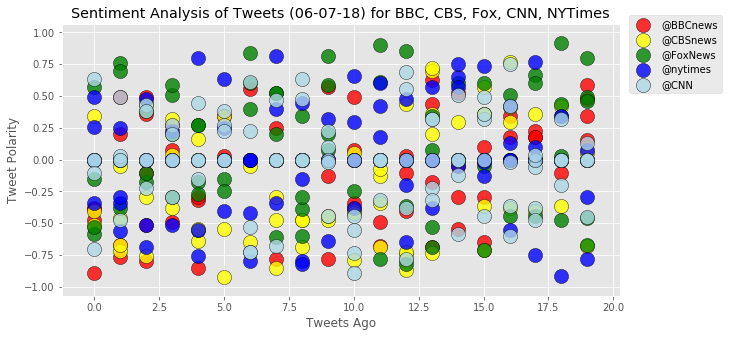

In [171]:
#filtering by account
bbc_df = sentiments_pd[sentiments_pd["Account"] == "@BBCnews"]
cbs_df = sentiments_pd[sentiments_pd["Account"] == "@CBSnews"]
fox_df = sentiments_pd[sentiments_pd["Account"] == "@FoxNews"]
nyt_df = sentiments_pd[sentiments_pd["Account"] == "@nytimes"]
cnn_df = sentiments_pd[sentiments_pd["Account"] == "@CNN"]

plt.figure(figsize=(10,5))

#plotting bbc
plt.scatter(bbc_df["Tweets Ago"], 
            bbc_df["Compound"],
            s=200,
            facecolors = "red", 
            edgecolors = "black", 
            alpha=0.8)

#plotting cbs
plt.scatter(cbs_df["Tweets Ago"], 
            cbs_df["Compound"],
            s=200,
            marker = "o" , 
            facecolors = "yellow", 
            edgecolors = "black", 
            alpha=0.8)

#plotting fox
plt.scatter(fox_df["Tweets Ago"], 
            fox_df["Compound"],
            s=200,
            marker = "o" , 
            facecolors = "green", 
            edgecolors = "black", 
            alpha=0.8)

#plotting nyt
plt.scatter(nyt_df["Tweets Ago"], 
            nyt_df["Compound"],
            s=200,
            marker = "o" , 
            facecolors = "blue", 
            edgecolors = "black", 
            alpha=0.8)

#plotting cnn
plt.scatter(cnn_df["Tweets Ago"], 
            cnn_df["Compound"],
            s=200,
            marker = "o" , 
            facecolors = "lightblue", 
            edgecolors = "black", 
            alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m-%d-%y")
plt.title(f"Sentiment Analysis of Tweets ({now}) for BBC, CBS, Fox, CNN, NYTimes")
from matplotlib import pylab
pylab.legend(target_user, loc="upper center", bbox_to_anchor=(1.10,1.05))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()


(-0.052560999999999976, -0.13935899999999998, -0.016733999999999995, 0.06944200000000002, -0.009324000000000006)


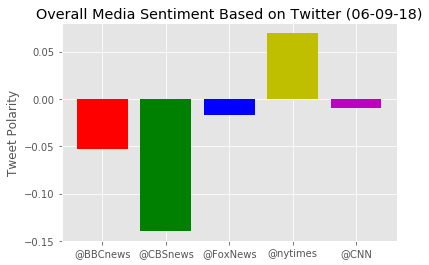

In [175]:
#setting different colors
mycolors = 'rgbymc'

#setting x and y values
compound_mean = sentiments_pd.groupby(['Account'])['Compound'].mean()
objects = sentiments_pd['Account'].unique()


#setting current date
now = datetime.now()
now = now.strftime("%m-%d-%y")
 
#plotting bar chart
plt.bar(objects, compound_mean, color=mycolors, align='center', alpha=1)  
#plt.xticks(y_pos, objects)
plt.ylabel('Tweet Polarity')
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")

t = tuple(compound_mean)
print(t)

#adding the data labels to each bar
#def autolabel(t):
    # attach some text labels
#    for rect in t:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                '%d' % float(height),
#                ha='center', va='bottom')

#autolabel(t)

#Axes.set_yticklabels(t, fontdict=None, minor=False, **kwargs)

plt.show()